# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Inserm</span>

Après réception du fichier csv contenant la liste de DOI enrichie (ajout du titre, des auteurs, de l'année, du statut open access...) de la part du MESRI, les graphiques peuvent être générés directement depuis le Baromètre national (voir le mode d'emploi sur la partie "déclinaisons locales" du site web du BSO national).
Néanmoins, à partir de ce fichier, certains graphiques réalisés pour le Baromètre Inserm peuvent toujours être générés et mis à jour en suivant ce code.
Il suffit de remplacer "inserm" par le nom de son établissement à l'intérieur du code.

Les résultats obtenus ici sont le reflet de la situation d'ouverture des publications en décembre 2021, date à laquelle les dernières extractions ont été réalisées. Le Baromètre national et, par extension, ses déclinaisons locales depuis le portail national, étant mis à jour régulièrement, les taux affichés sur les graphiques ci-dessous sont obsolètes.

In [1]:
import pandas as pd

In [2]:
import csv

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

In [4]:
publis_inserm_df = pd.read_csv("Data/outputs/bso-publications-latest_180036048_enriched.csv",sep=";")

## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

Proportion des publications 2020 en accès ouvert

In [5]:
pie_data = publis_inserm_df.loc[publis_inserm_df['year'] == 2021.0,:]
pie_data

,observation_date,id,doi,pmid,hal_id,year,title,journal_issns,journal_issn_l,journal_name,...,licence_repositories,repositories,software_mentions,data_mentions,software_used,software_created,software_shared,data_used,data_created,data_shared
73,2022Q4,doi10.35848/1882-0786/ac3d1e,10.35848/1882-0786/ac3d1e,NaN,NaN,2021,Ultrafast phased-array imaging with pump excit...,"1882-0778,1882-0786",1882-0778,Applied Physics Express,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2022Q4,doi10.1007/s10096-021-04385-1,10.1007/s10096-021-04385-1,NaN,NaN,2021,Direct detection of extended-spectrum-β-lactam...,"0934-9723,1435-4373",0934-9723,European Journal of Clinical Microbiology &amp...,...,no license,PubMed Central;iris.unito.it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2022Q4,doi10.1016/j.banm.2021.10.002,10.1016/j.banm.2021.10.002,NaN,NaN,2021,Apprentissage de la chirurgie robotique : de n...,0001-4079,0001-4079,Bulletin de l'Académie Nationale de Médecine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2022Q4,doi10.1073/pnas.2115508118,10.1073/pnas.2115508118,NaN,NaN,2021,The Epstein–Barr virus noncoding RNA EBER2 tra...,"0027-8424,1091-6490",0027-8424,Proceedings of the National Academy of Sciences,...,no license,PubMed Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2022Q4,doi10.1109/tbme.2021.3056022,10.1109/tbme.2021.3056022,NaN,NaN,2021,A Parametric Study on Factors Influencing the ...,"0018-9294,1558-2531",0018-9294,IEEE Transactions on Biomedical Engineering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108222,2022Q4,doi10.3389/fnins.2021.691244,10.3389/fnins.2021.691244,34321995.0,NaN,2021,MRI Radiomic Signature of White Matter Hyperin...,1662-453X,1662-453X,Frontiers in Neuroscience,...,cc-by,HELDA - Digital Repository of the University o...,learn;BestNormalize;PyRadiomics;ElasticNet,radiomics;images;Radiomic features;patients;Lo...,True,False,False,True,False,True
108223,2022Q4,doi10.1073/pnas.2102217118,10.1073/pnas.2102217118,34389672.0,hal-03360218,2021,Neural excitability increases with axonal resi...,"0027-8424,1091-6490",0027-8424,Proceedings of the National Academy of Sciences,...,no license,HAL;PubMed Central;bioRxiv,ImageJ;ClampFit;software;LabView,Whole-cell recordings;AP threshold;axon;Electr...,True,False,False,True,False,False
108224,2022Q4,doi10.1038/s41436-021-01246-2,10.1038/s41436-021-01246-2,34345025.0,NaN,2021,Delineating the molecular and phenotypic spect...,1098-3600,1098-3600,Genetics in Medicine,...,cc-by,HELDA - Digital Repository of the University o...,Alamut;Pymol;Face2Gene,SETD1B;severity score;immunocytochemistry;Geno...,True,False,False,True,True,False
108225,2022Q4,doi10.1371/journal.ppat.1009427,10.1371/journal.ppat.1009427,34370799.0,anses-03387992,2021,Intranasal type I interferon treatment is bene...,1553-7374,1553-7366,PLOS Pathogens,...,cc-by,HAL;PubMed Central;bioRxiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Récuperer les différentes valeurs qui nous intéressent:
- closed = l'article n'est pas en accès ouvert/dans un journal non ouvert
- gold_journal = l'article est dans un journal gold
    - gold_gold : gold + gold
    - gold_archives_ouvertes : gold + archives ouvertes
- free: libre éditeur
    - free_archives_ouvertes: free + archives ouvertes
    - free_freepubli : free + free
- archives ouvertes simple

In [6]:
oa_yes_no = pie_data['is_oa'].value_counts().sort_index().rename({False: 'Accès fermé global', True: 'Accès ouvert global'})
oa_yes_no

Accès fermé global      4932
Accès ouvert global    16207
Name: is_oa, dtype: int64

In [7]:
oa_no = (pie_data['is_oa'] == False)
oa_yes = (pie_data['is_oa'] == True)
assert(len(pie_data) == sum(oa_no)+sum(oa_yes))

In [8]:
# si dans le doaj alors gold
gold = (pie_data['journal_is_in_doaj'] == True)

In [9]:
# si oa et pas gold alors free
free = oa_yes & (pie_data['journal_is_in_doaj'] == False)

In [10]:
assert(len(pie_data) == sum(oa_no)+sum(gold)+sum(free))

In [11]:
print(f"Acces fermé: {sum(oa_no)/len(pie_data):.2%}\nGold: {sum(gold)/len(pie_data):.2%}\nFree {sum(free)/len(pie_data):.2%}")

Acces fermé: 23.33%
Gold: 36.64%
Free 40.03%


**Free** se décompose en **"Libre éditeur"** + **"Archives ouvertes"**  
* "Libre éditeur" = "publisher" + "publisher;repository"  
* "Archives ouvertes" = "repository"

In [12]:
libre_editeur =  free & ((pie_data['oa_host_type'] == 'publisher') | (pie_data['oa_host_type'] == 'publisher;repository'))

In [13]:
archive_ouverte = free & (pie_data['oa_host_type'] == 'repository')

In [14]:
assert(sum(free) == sum(libre_editeur)+sum(archive_ouverte))

In [15]:
pie_data_ext = pd.DataFrame({'oa_no' : oa_no,
                             'gold' : gold,
                             'libre_editeur' : libre_editeur,
                             'archive_ouverte' : archive_ouverte
                            })
pie_data_ext

,oa_no,gold,libre_editeur,archive_ouverte
73,True,False,False,False
74,False,False,True,False
75,True,False,False,False
76,False,False,False,True
77,True,False,False,False
...,...,...,...,...
108222,False,True,False,False
108223,False,False,True,False
108224,False,False,True,False
108225,False,True,False,False


In [16]:
pie_data_ext_type = pie_data_ext.dot(pie_data_ext.columns).to_frame('type')
pie_data_ext_type

,type
73,oa_no
74,libre_editeur
75,oa_no
76,archive_ouverte
77,oa_no
...,...
108222,gold
108223,libre_editeur
108224,libre_editeur
108225,gold


In [17]:
pie_data_ext_chiffres = pie_data_ext_type.value_counts(normalize=True, sort=False)[['oa_no','gold','libre_editeur','archive_ouverte']].rename({'oa_no': 'Accès fermé', 'gold' : 'Gold', 'libre_editeur' : 'Libre éditeur', 'archive_ouverte' : 'Archives ouvertes'})
pie_data_ext_chiffres.mul(100).round(1).astype(str) + '%'

type             
Accès fermé          23.3%
Gold                 36.6%
Libre éditeur        26.6%
Archives ouvertes    13.4%
dtype: object

In [18]:
gold_publi = gold & (pie_data['oa_host_type'] == 'publisher')

In [19]:
gold_rep = gold & (pie_data['oa_host_type'] == 'publisher;repository')

In [20]:
gold_rep_only = gold & (pie_data['oa_host_type'] == 'repository')

In [21]:
assert(sum(gold) == sum(gold_publi)+sum(gold_rep)+sum(gold_rep_only))

In [22]:
print(f"Répartition Gold: \ngold_publi: {sum(gold_publi)/sum(gold):.2%}\ngold_rep: {sum(gold_rep)/sum(gold):.2%}\ngold_rep_only: {sum(gold_rep_only)/sum(gold):.2%}")

Répartition Gold: 
gold_publi: 1.17%
gold_rep: 95.49%
gold_rep_only: 3.33%


In [23]:
free_publi = free & (pie_data['oa_host_type'] == 'publisher')

In [24]:
free_rep = free & (pie_data['oa_host_type'] =='publisher;repository')

In [25]:
free_rep_only = free & (pie_data['oa_host_type'] =='repository')

In [26]:
assert(sum(free) == sum(free_publi)+sum(free_rep)+sum(free_rep_only))

In [27]:
print(f"Répartition Free: \nfree_publi: {sum(free_publi)/sum(free):.2%}\nfree_rep: {sum(free_rep)/sum(free):.2%}\nfree_rep_only: {sum(free_rep_only)/sum(free):.2%}")

Répartition Free: 
free_publi: 21.49%
free_rep: 44.94%
free_rep_only: 33.58%


In [28]:
pie_data_int = pd.DataFrame({'oa_no' : oa_no,
                   'gold_publi' : gold_publi ,
                   'gold_rep' : gold_rep,
                   'gold_rep_only' : gold_rep_only,
                   'free_publi' : free_publi,
                   'free_rep' : free_rep,
                   'archive_ouverte' : archive_ouverte
                            })
pie_data_int

,oa_no,gold_publi,gold_rep,gold_rep_only,free_publi,free_rep,archive_ouverte
73,True,False,False,False,False,False,False
74,False,False,False,False,False,True,False
75,True,False,False,False,False,False,False
76,False,False,False,False,False,False,True
77,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
108222,False,False,True,False,False,False,False
108223,False,False,False,False,False,True,False
108224,False,False,False,False,False,True,False
108225,False,False,True,False,False,False,False


In [29]:
pie_data_int_type = pie_data_int.dot(pie_data_int.columns).to_frame('type')
pie_data_int_type

,type
73,oa_no
74,free_rep
75,oa_no
76,archive_ouverte
77,oa_no
...,...
108222,gold_rep
108223,free_rep
108224,free_rep
108225,gold_rep


In [30]:
pie_data_int_chiffres = pie_data_int_type.value_counts(normalize=True, sort=False)[['oa_no','gold_publi','gold_rep','gold_rep_only','free_publi','free_rep','archive_ouverte']].rename({'oa_no': 'Accès fermé', 'gold_publi' : 'Gold éditeur', 'gold_rep' : 'Gold en Archives ouvertes', 'free_publi' : 'Libre éditeur', 'free_rep' : 'Libre éditeur en Archives ouvertes', 'archive_ouverte' : 'Archives ouvertes'})
pie_data_int_chiffres.mul(100).round(1).astype(str) + '%'

type                              
Accès fermé                           23.3%
Gold éditeur                           0.4%
Gold en Archives ouvertes             35.0%
gold_rep_only                          1.2%
Libre éditeur                          8.6%
Libre éditeur en Archives ouvertes    18.0%
Archives ouvertes                     13.4%
dtype: object

C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_7588\806851868.py:31: UserWarning: The label '_nolegend_' of <matplotlib.patches.Wedge object at 0x000001F4C8D80430> starts with '_'. It is thus excluded from the legend.
  legende_int  = fig.legend(slices_int,
C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_7588\806851868.py:31: UserWarning: The label '_nolegend_' of <matplotlib.patches.Wedge object at 0x000001F4C8D80D60> starts with '_'. It is thus excluded from the legend.
  legende_int  = fig.legend(slices_int,


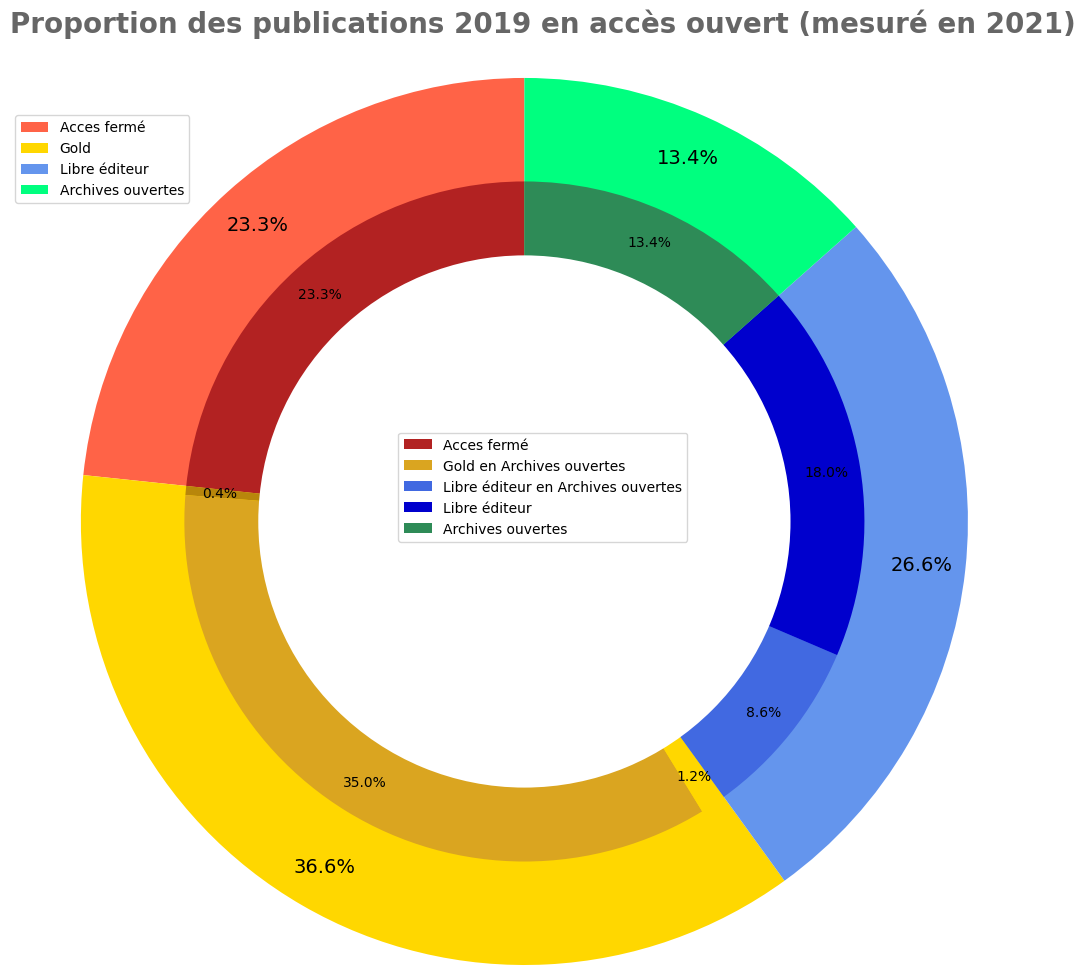

In [34]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
# Cercle extérieur
slices_ext, legend_labels_ext, pct_labels_ext = ax.pie(pie_data_ext_chiffres,  
       radius=3, 
       labeldistance = None,
       textprops = {'fontsize':14, 'color':'black'}, 
       colors=['tomato', 'gold', 'cornflowerblue', 'springgreen', ],  
       autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9, 
       startangle=90,
       frame = True
      );
# Cercle intérieur
slices_int, legend_labels_int, pct_labels_int = ax.pie(pie_data_int_chiffres,
       radius=2.3, 
       labeldistance = None, 
       colors=['firebrick','darkgoldenrod','goldenrod','gold','royalblue','mediumblue','seagreen'], autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9, 
       startangle=90);
# Cercle blanc intérieur
ax.pie([1], radius=1.8, colors='white');
# Legende extérieur
legende_ext = plt.legend(slices_ext, 
                           ['Acces fermé', 'Gold','Libre éditeur','Archives ouvertes'],  
                           bbox_to_anchor=(0,1.25), 
                           loc="center right", 
                           bbox_transform=plt.gcf().transFigure
                          )
# Legende intérieur (la légende est ajoutée à la figure et non au plot, sinon la légende précedente est écrasée)
legende_int  = fig.legend(slices_int, 
                           ['Acces fermé', '_nolegend_', 'Gold en Archives ouvertes', '_nolegend_', 'Libre éditeur en Archives ouvertes', 'Libre éditeur', 'Archives ouvertes'],  
                            loc = "center"
                          )
#ax.legend(loc="center", fontsize = 12)
plt.title('Proportion des publications 2019 en accès ouvert (mesuré en 2021)', fontsize = 20, x = 0.55, y = 1.8,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_proportion_publications_oa_20211214.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

Taux d'accès ouvert par disciplines 2020

In [61]:
publications_2020 = publis_inserm_df.loc[publis_inserm_df['year'] == 2020.0,:]

In [62]:
publications_par_domaine_type = publications_2020['bso_classification'].value_counts().sort_index()
publications_par_domaine_type

Biology (fond.)                                7597
Chemistry                                       576
Computer and  information sciences              215
Earth, Ecology, Energy and applied biology      252
Engineering                                     568
Humanities                                      243
Mathematics                                      84
Medical research                              10053
Physical sciences, Astronomy                    279
Social sciences                                 114
Name: bso_classification, dtype: int64

In [63]:
conditionlist = [
    (publications_2020['is_oa'] == False) ,
    (publications_2020['journal_is_in_doaj'] == True),
    ((publications_2020['is_oa'] == True) & (publications_2020['journal_is_in_doaj'] == False) & ((publications_2020['oa_host_type'] == 'publisher') | (publications_2020['oa_host_type'] == 'publisher;repository'))),
    (publications_2020['oa_host_type'] == 'repository') 
    ]
choicelist = ['closed', 'gold', 'free', 'rep']
publications_2020['depot'] = np.select(conditionlist, choicelist, default='Not Specified')

C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_18296\278930648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publications_2020['depot'] = np.select(conditionlist, choicelist, default='Not Specified')


In [64]:
df_oa_discipline_global_type = pd.crosstab([publications_2020['bso_classification']],publications_2020['depot'])
# Ajout d'une colonne avec le total par discipline
df_oa_discipline_global_type["Total"] = publications_par_domaine_type
# Traduction des disciplines en français
df_oa_discipline_global_type.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline_global_type = df_oa_discipline_global_type.sort_values(by='closed', ascending=True)
# Ajout d'une colonne qui concatène le nom de la discipline et le total
df_oa_discipline_global_type["y_label"] = df_oa_discipline_global_type.index + "\n" + df_oa_discipline_global_type["Total"].apply(str) \
                                     + " " + "publications"
# Réindexation de l'index pour que les bonnes informations s'affichent dans le graphique final
df_oa_discipline_global_type.index = df_oa_discipline_global_type["y_label"]
df_oa_discipline_global_type

depot,closed,free,gold,rep,Total,y_label
y_label,,,,,,
"Earth, Ecology, Energy and applied biology\n252 publications",18,72,103,59,252,"Earth, Ecology, Energy and applied biology\n25..."
Mathématiques\n84 publications,19,21,23,21,84,Mathématiques\n84 publications
Computer and information sciences\n215 publications,24,54,64,73,215,Computer and information sciences\n215 public...
"Sciences physiques, astronomie\n279 publications",34,68,59,118,279,"Sciences physiques, astronomie\n279 publications"
Sciences sociales\n114 publications,44,27,25,18,114,Sciences sociales\n114 publications
Humanités\n243 publications,53,89,55,46,243,Humanités\n243 publications
Chimie\n576 publications,70,151,116,239,576,Chimie\n576 publications
Sciences de l'Ingénieur\n568 publications,87,151,168,162,568,Sciences de l'Ingénieur\n568 publications
Biologie (fond.)\n7597 publications,1006,2589,2564,1438,7597,Biologie (fond.)\n7597 publications


In [65]:
df_oa_discipline_type = pd.crosstab([publications_2020['bso_classification']],publications_2020['depot'])
df_oa_discipline_type = (df_oa_discipline_type.T / df_oa_discipline_type.T.sum()).mul(100).round(1)
df_oa_discipline_type = df_oa_discipline_type.T
df_oa_discipline_type["Total"] = publications_par_domaine_type
df_oa_discipline_type.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline_type["y_label"] = df_oa_discipline_type.index + "\n" + df_oa_discipline_type["Total"].apply(str) \
                                     + " " + "publications"
df_oa_discipline_type.index = df_oa_discipline_type["y_label"]
df_oa_discipline_type = df_oa_discipline_type.sort_values(by='closed', ascending=True)
df_oa_discipline_type

depot,closed,free,gold,rep,Total,y_label
y_label,,,,,,
"Earth, Ecology, Energy and applied biology\n252 publications",7.1,28.6,40.9,23.4,252,"Earth, Ecology, Energy and applied biology\n25..."
Computer and information sciences\n215 publications,11.2,25.1,29.8,34.0,215,Computer and information sciences\n215 public...
Chimie\n576 publications,12.2,26.2,20.1,41.5,576,Chimie\n576 publications
"Sciences physiques, astronomie\n279 publications",12.2,24.4,21.1,42.3,279,"Sciences physiques, astronomie\n279 publications"
Biologie (fond.)\n7597 publications,13.2,34.1,33.8,18.9,7597,Biologie (fond.)\n7597 publications
Sciences de l'Ingénieur\n568 publications,15.3,26.6,29.6,28.5,568,Sciences de l'Ingénieur\n568 publications
Humanités\n243 publications,21.8,36.6,22.6,18.9,243,Humanités\n243 publications
Mathématiques\n84 publications,22.6,25.0,27.4,25.0,84,Mathématiques\n84 publications
Sciences médicales\n10053 publications,25.8,30.8,30.0,13.3,10053,Sciences médicales\n10053 publications


Text(0.49, 1.02, "Taux d'accès ouvert aux publications 2020 par discipline")

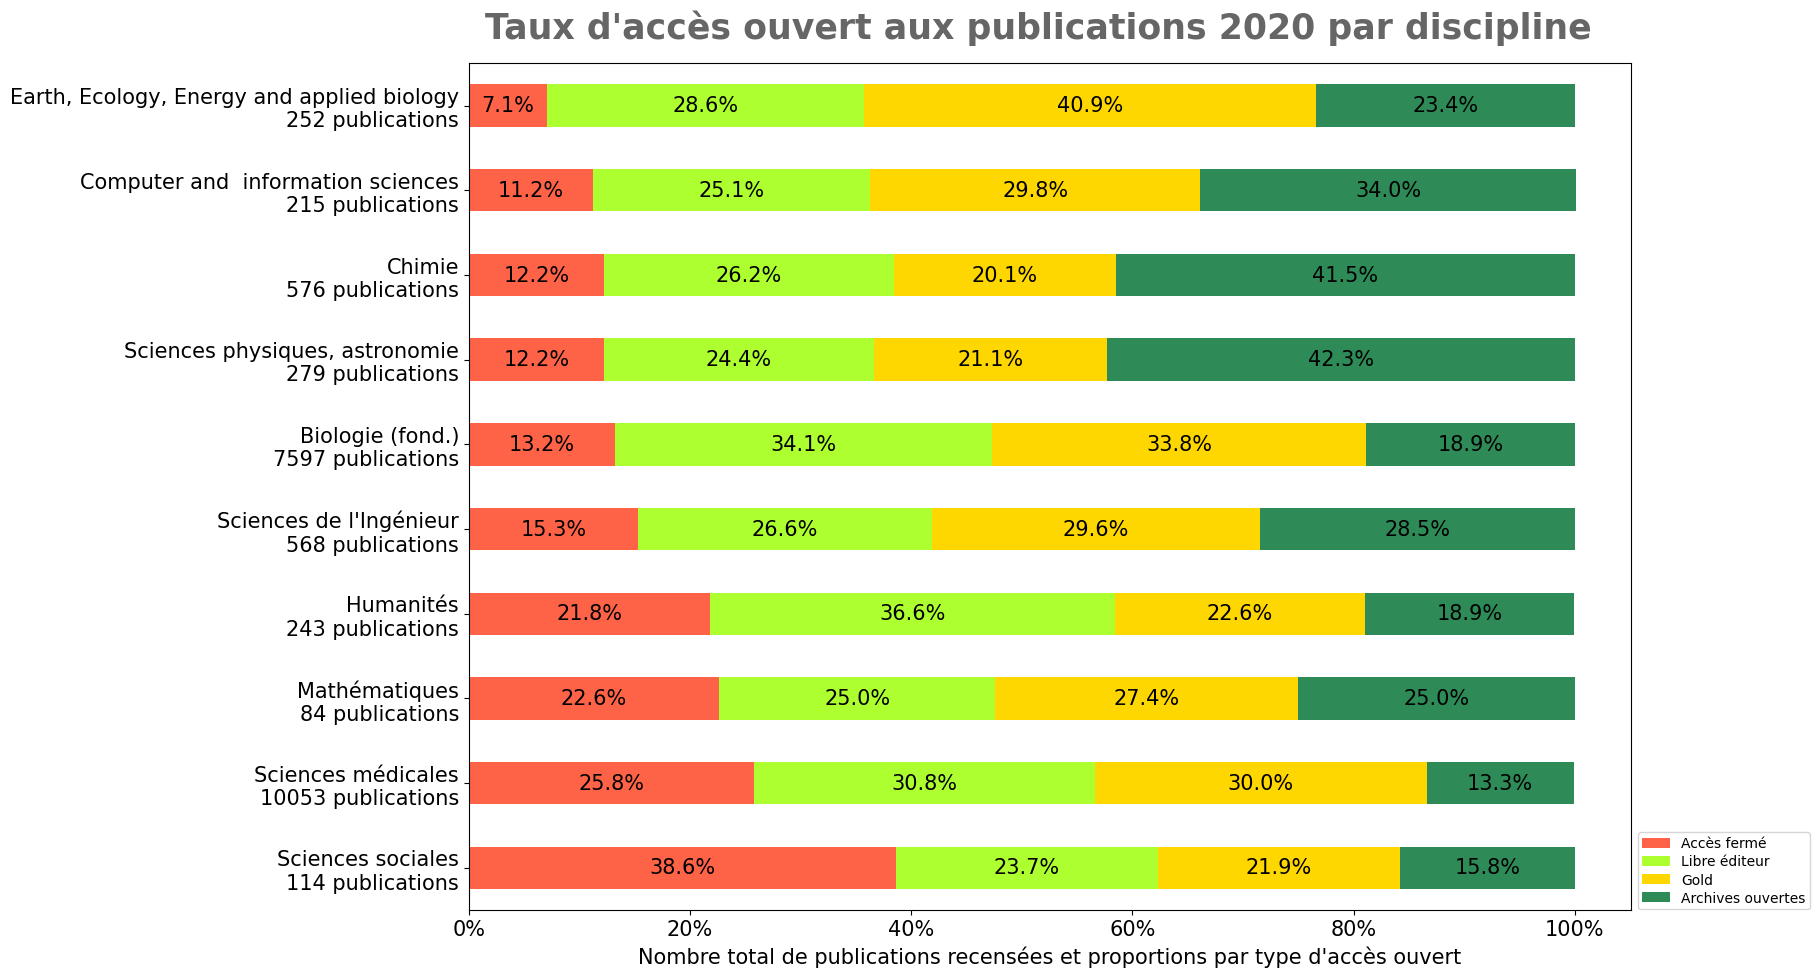

In [66]:
import matplotlib.ticker as mtick

ax = df_oa_discipline_type.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','greenyellow','gold','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_discipline_type.columns:
    for i in df_oa_discipline_type.index:
        label = str(df_oa_discipline_type.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# Trier les disciplines par ordre alphabétique
plt.gca().invert_yaxis()
plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 13)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.
plt.legend(['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2020 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
#plt.savefig('Data/outputs/2020_taux_type_oa_discipline_type_20220217.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

Evolution des frais de publications (APC)

Les données ont majoritairement été extraites de la plateformes OpenAPC mais une partie des sources sont internes à l'Institut. Pour autant, l'Inserm met à disposition cette portion de code, à toutes fins utiles.

In [67]:
open_APC_df = pd.read_csv("Data/raw/open_apc_inserm_15-19.csv")

In [68]:
all_graph_data_df = open_APC_df.sort_values(['period','is_hybrid','euro'],ascending=False)
graph_data_df = all_graph_data_df[['period','is_hybrid','euro']]

In [69]:
graph_data_df

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [70]:
graph_data_gold = graph_data_df.loc[graph_data_df['is_hybrid'] == False,:]

In [71]:
graph_data_gold

,period,is_hybrid,euro
1635,2019,False,5148.00
1622,2019,False,4500.00
1657,2019,False,4480.00
1948,2019,False,4480.00
2015,2019,False,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [72]:
graph_data_gold_2019 = graph_data_gold.loc[graph_data_gold['period'] == 2019.0,:]
somme_gold_2019 = graph_data_gold_2019['euro'].sum()

In [73]:
somme_gold_2019

1105484.3

In [74]:
graph_data_gold_2018 = graph_data_gold.loc[graph_data_gold['period'] == 2018.0,:]
somme_gold_2018 = graph_data_gold_2018['euro'].sum()

In [75]:
somme_gold_2018

781361.5700000001

In [76]:
graph_data_gold_2017 = graph_data_gold.loc[graph_data_gold['period'] == 2017.0,:]
somme_gold_2017 = graph_data_gold_2017['euro'].sum()

In [77]:
somme_gold_2017

1042570.37

In [78]:
graph_data_gold_2015 = graph_data_gold.loc[graph_data_gold['period'] == 2015.0,:]
somme_gold_2015 = graph_data_gold_2015['euro'].sum()

In [79]:
somme_gold_2015

645550.9400000001

In [80]:
graph_data_hybrid = graph_data_df.loc[graph_data_df['is_hybrid'] == True,:]

In [81]:
graph_data_hybrid

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
446,2015,True,741.00
447,2015,True,734.00
458,2015,True,536.90
461,2015,True,450.00


In [82]:
graph_data_hybrid_2019 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2019.0,:]
somme_hybrid_2019 = graph_data_hybrid_2019['euro'].sum()

In [83]:
somme_hybrid_2019

158720.41999999998

In [84]:
graph_data_hybrid_2018 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2018.0,:]
somme_hybrid_2018 = graph_data_hybrid_2018['euro'].sum()

In [85]:
somme_hybrid_2018

141293.34

In [86]:
graph_data_hybrid_2017 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2017.0,:]
somme_hybrid_2017 = graph_data_hybrid_2017['euro'].sum()

In [87]:
somme_hybrid_2017

166908.78

In [88]:
graph_data_hybrid_2015 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2015.0,:]
somme_hybrid_2015 = graph_data_hybrid_2015['euro'].sum()

In [89]:
somme_hybrid_2015

172639.52000000002

C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_18296\4222670905.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['0', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])


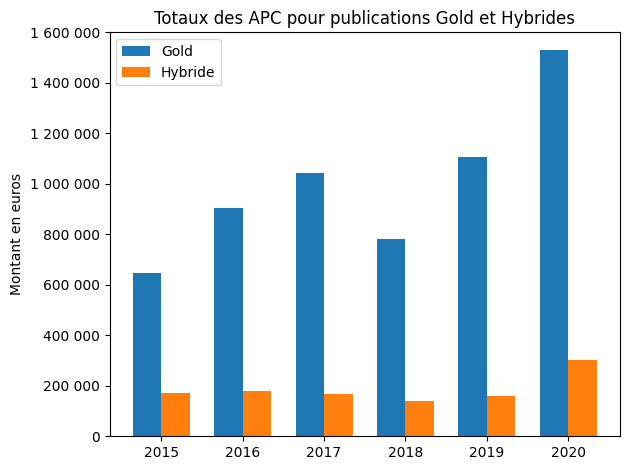

In [90]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['2015', '2016', '2017', '2018', '2019', '2020']
gold = [somme_gold_2015, 902802, somme_gold_2017, somme_gold_2018, somme_gold_2019, 1529664]
hybrid = [somme_hybrid_2015, 179945, somme_hybrid_2017, somme_hybrid_2018, somme_hybrid_2019, 303541]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gold, width, label='Gold')
rects2 = ax.bar(x + width/2, hybrid, width, label='Hybride')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Montant en euros')
ax.set_title('Totaux des APC pour publications Gold et Hybrides')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1600000)
ax.yaxis.set_ticklabels(['0', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])
ax.legend()
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

#plt.show()

#plt.savefig('./Totaux_APC_Gold_Hybride_20211110.png', dpi=100, bbox_inches='tight', pad_inches=0.9)